In [43]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [44]:
%matplotlib inline

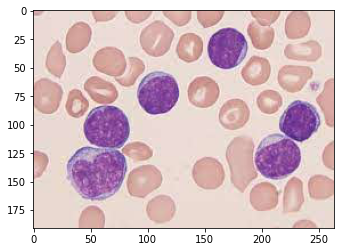

In [51]:
cvimg = cv2.imread('dataset/train/img-1.jpg')
rgbimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2RGB)
plt.imshow(rgbimg)

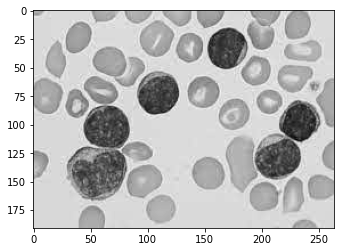

In [46]:
gsimg = cv2.cvtColor(cvimg, cv2.COLOR_BGR2GRAY)
plt.imshow(gsimg, 'gray')

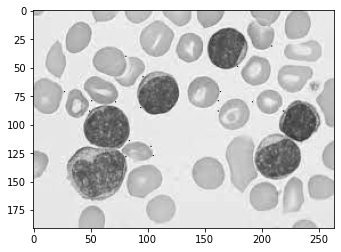

In [47]:
def my_rgb2gray(img_rgb):
    img_gray = np.ndarray((img_rgb.shape[0], img_rgb.shape[1]))
    img_gray = 0.21*img_rgb[:, :, 0] + 0.77*img_rgb[:, :, 1] + 0.07*img_rgb[:, :, 2]
    img_gray = img_gray.astype('uint8')
    return img_gray
scgsimg = my_rgb2gray(rgbimg)
plt.imshow(scgsimg, 'gray')

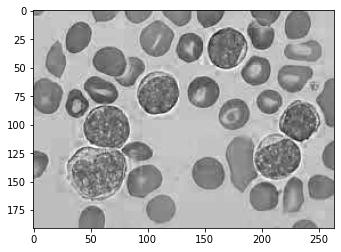

In [53]:
blueimg = cvimg[:,:,0].astype('float64')
blueimg *= (255.0/blueimg.max())
blueimg = blueimg.astype('uint8')
plt.imshow(blueimg, 'gray')

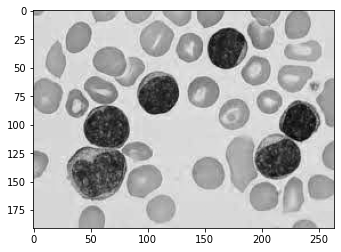

In [54]:
greenimg = cvimg[:,:,1].astype('float64')
greenimg *= (255.0/greenimg.max())
greenimg = greenimg.astype('uint8')
plt.imshow(greenimg, 'gray')

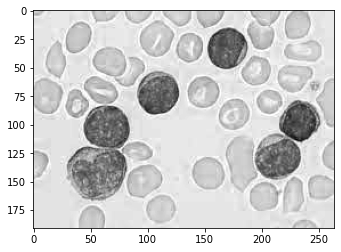

In [55]:
redimg = cvimg[:,:,2].astype('float64')
redimg *= (255.0/redimg.max())
redimg = redimg.astype('uint8')
plt.imshow(redimg, 'gray')

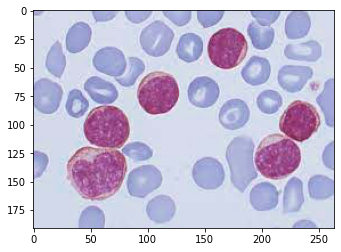

In [52]:
plt.imshow(cvimg)

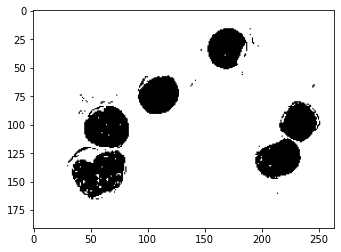

In [63]:
_, bingreenimg = cv2.threshold(greenimg, 127, 255, cv2.THRESH_BINARY)
plt.imshow(bingreenimg, 'gray')

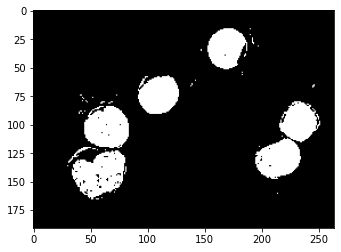

In [67]:
invbingreenimg = 255-bingreenimg
plt.imshow(invbingreenimg, 'gray')

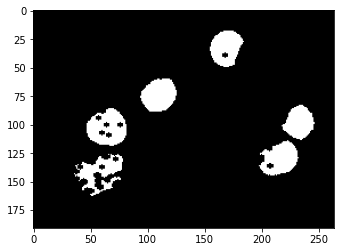

In [143]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
erodedinvbingreenimg = cv2.erode(invbingreenimg, kernel, iterations=1)
plt.imshow(erodedinvbingreenimg, 'gray')

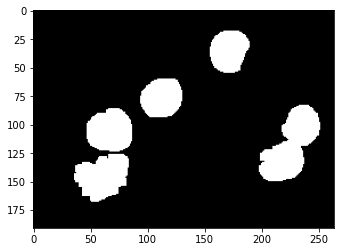

In [153]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
dilatederodedinvbingreenimg = cv2.dilate(erodedinvbingreenimg, kernel, iterations=5)
plt.imshow(dilatederodedinvbingreenimg, 'gray')

In [154]:
img, contours, hierarchy = cv2.findContours(dilatederodedinvbingreenimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

5


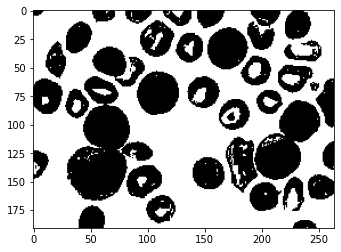

In [157]:
_, bingsimg = cv2.threshold(gsimg, 192, 255, cv2.THRESH_BINARY)
plt.imshow(bingsimg, 'gray')

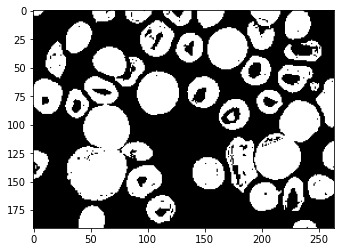

In [159]:
invbingsimg = 255 - bingsimg
plt.imshow(invbingsimg, 'gray')

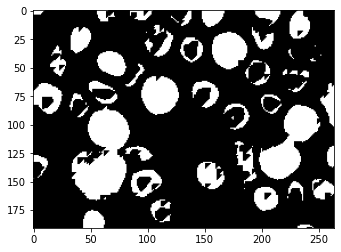

In [164]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
erodedinvbingsimg = cv2.erode(invbingsimg, kernel, iterations=4)
plt.imshow(erodedinvbingsimg, 'gray')

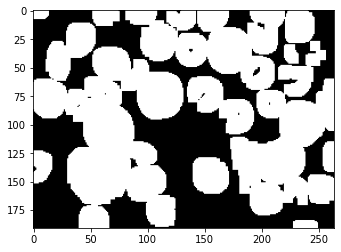

In [173]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilatederodedinvbingsimg = cv2.dilate(erodedinvbingsimg, kernel, iterations=4)
plt.imshow(dilatederodedinvbingsimg, 'gray')

In [174]:
img, contours, hierarchy = cv2.findContours(dilatederodedinvbingsimg, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

31
